# General

https://github.com/obersteiner/sparseSpACE/blob/master/ipynb/Tutorial.ipynb

The spatially-adaptive-combi framework aims at providing a generalized interface for calculating the Combination Technique with spatial adaptive strategies.

Currently this is restricted to the calculation of an integral over a function $f$:

$$\int_{x \in D} f(x) dx$$

where $x$ is an d-dimensional vector and D is the d-dimensional Domain which is defined by the lower bound $a$ and the upper bound $b$. Usually one defines $D=[0,1]^d$ but other rectangular domains are also possible.

# Functions

Lets look at my own max of many multi variate gaussians.

x---------
So let's first look at the pre-defined functions that we can use in the framework. All implemented funcitons can be found in Functions.py and they typically offer the functionality to evaluate the function at a certain point and to return the analytic integral value for a specified domain. Furthermore plotting a function is already available directly in the framework. So let's try one of the functions namely $GenzCornerPeak$.
x---------


In [1]:
#allows any changes on external files to be loaded on code run.
%load_ext autoreload
%autoreload 2

/home/djdaniel/GENE_UQ/sparseSpACE/../GENE_ML/gene_ml/test_functions/max_of_many_gaussians.py:98: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figure.show()


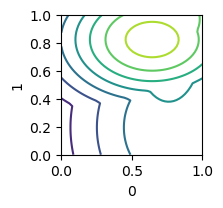

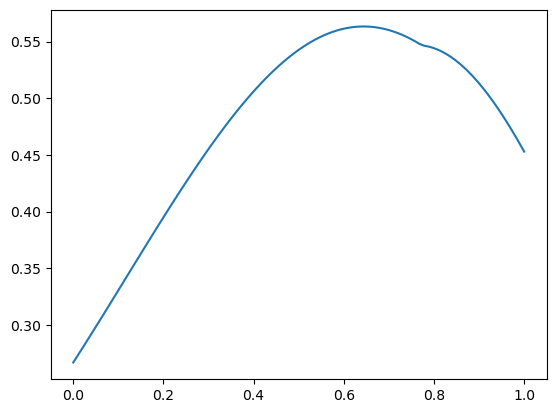

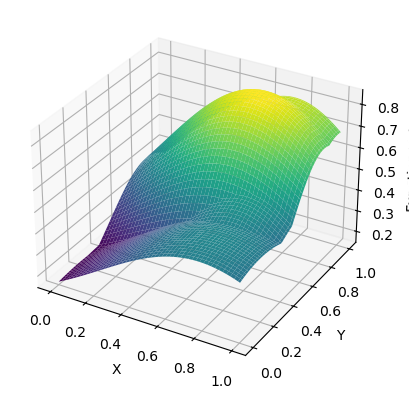

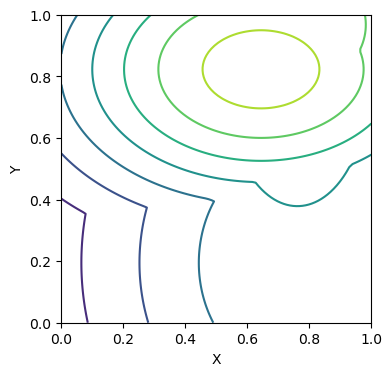

In [2]:
from sparseSpACE.Function import Function
import numpy as np
class function_wrap(Function):
    def __init__(self, function):
        # The function must be defined to be 0 outside the same boundaries that will be fed into SparseSpACE
        super().__init__()
        self.function = function

    def eval(self,X):
        return self.function(X)

import sys
import matplotlib.pyplot as plt
import os
sys.path.append(os.path.join(os.curdir,'..'))
from GENE_ML.gene_ml.test_functions.max_of_many_gaussians import MaxOfManyGaussians

num_dim = 2
confine = 0#0.5
mean_bounds = [(0+confine,1-confine) for i in range(num_dim)]
bounds = [(0,1) for i in range(num_dim)]
std_bounds=(0.1,0.5)
# std_bounds=(0.008,0.01)

num_gaussians = 6
mmg = MaxOfManyGaussians(num_dim, num_gaussians, bounds, mean_bounds, std_bounds, seed=42)
# mmg.plot_2d_gaussians(extra=0, grid_size=200, plot_bounds=[(0,1),(0,1)], style='contour')
# mmg.plot_2D_of_many(which2=(0,1), style='contour')
mmg.plot_matrix_contour()
mmg.plot_2d_gaussians()
mmg_wraped = function_wrap(mmg.evaluate)




# %matplotlib inline
# import sparseSpACE

# from sparseSpACE.Function import *
# import numpy as np
# dim = 2
# coeffs = np.ones(dim)
# a = np.zeros(dim)
# b = np.ones(dim)
# f = GenzCornerPeak(coeffs=coeffs)
# f.plot(a, b)
# print("The function value at (0,0.5) is", f.eval((0,0.5)))
# print("The analytical integral value in the Domain [0,1]^d is", 
#       f.getAnalyticSolutionIntegral(np.zeros(dim), np.ones(dim)))

# How many points untill UQ-out distribution convergence?

## >2D

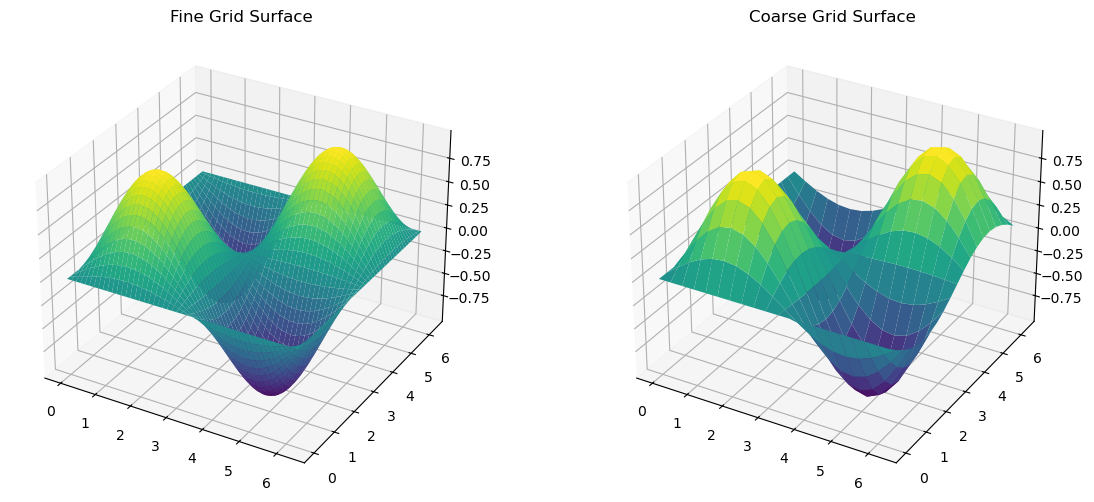

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# def create_coarse_grid(bounds, test_grid_size, step_size):
#     # Generate the initial fine grid
#     x = [np.linspace(*b, test_grid_size) for b in bounds]
#     X = np.meshgrid(*x, indexing='ij')
#     pos_test = np.vstack([Xi.ravel() for Xi in X]).T

#     # Reshape the grid to a higher-dimensional array
#     grid_shape = [test_grid_size] * len(bounds)
#     reshaped_grid = pos_test.reshape(grid_shape + [len(bounds)])

#     # Select every nth point along each dimension
#     slices = tuple(slice(None, None, step_size) for _ in bounds)
#     coarse_grid = reshaped_grid[slices].reshape(-1, len(bounds))

#     return pos_test, coarse_grid

# # Example usage for 2D
# bounds = [(0, 1), (0, 1)]  # Example bounds for a 2D grid
# test_grid_size = 100  # Fine grid size
# step_size = 5  # Coarser grid step size

# fine_grid, coarse_grid = create_coarse_grid(bounds, test_grid_size, step_size)

# # # Assuming mmg.evaluate() is a sine wave function
# # def mmg_evaluate(grid):
# #     return np.sin(grid[:, 0]) * np.sin(grid[:, 1])

# Z_fine = mmg.evaluate(fine_grid).reshape(test_grid_size, test_grid_size)
# Z_coarse = mmg.evaluate(coarse_grid).reshape(test_grid_size // step_size, test_grid_size // step_size)

# # Plotting the surface of the fine grid and the coarse grid
# fig = plt.figure(figsize=(14, 6))

# # Plot fine grid surface
# ax1 = fig.add_subplot(121, projection='3d')
# X_fine, Y_fine = np.meshgrid(np.linspace(0, 2*np.pi, test_grid_size), np.linspace(0, 2*np.pi, test_grid_size))
# ax1.plot_surface(X_fine, Y_fine, Z_fine, cmap='viridis')
# ax1.set_title('Fine Grid Surface')

# # Plot coarse grid surface
# ax2 = fig.add_subplot(122, projection='3d')
# X_coarse, Y_coarse = np.meshgrid(np.linspace(0, 2*np.pi, test_grid_size // step_size), np.linspace(0, 2*np.pi, test_grid_size // step_size))
# ax2.plot_surface(X_coarse, Y_coarse, Z_coarse, cmap='viridis')
# ax2.set_title('Coarse Grid Surface')

# plt.show()



/tmp/ipykernel_20731/1983294742.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (0, 2) and arg 2 with shape (20, 20).

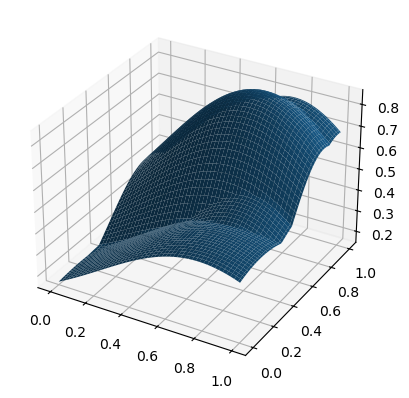

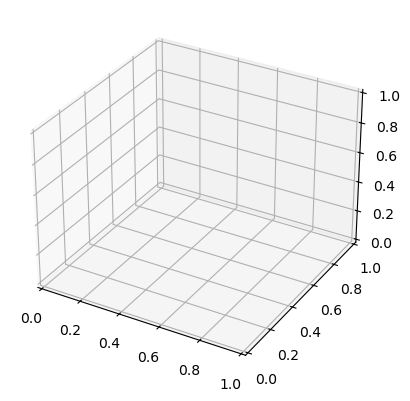

In [16]:
import numpy as np

# Example usage
bounds = [(0,1),(0,1)]
test_grid_size = 100  # Fine grid size
step_size = 5  # Coarser grid step size

# Generate the initial fine grid
x = [np.linspace(*b, test_grid_size) for b in bounds]
X = np.meshgrid(*x, indexing='ij')
pos_test = np.dstack(X)#np.vstack([Xi.ravel() for Xi in X]).T
Z_fine = mmg.evaluate(pos_test)

def create_coarse_grid(bounds, test_grid_size, step_size):
    # Reshape the grid to a higher-dimensional array
    grid_shape = [test_grid_size] * len(bounds)
    reshaped_grid = pos_test.reshape(grid_shape + [len(bounds)])

    # Select every nth point along each dimension
    slices = tuple(slice(None, None, step_size) for _ in bounds)
    coarse_grid = reshaped_grid[slices].reshape(-1, len(bounds))

    return coarse_grid



coarse_grid = create_coarse_grid(bounds, test_grid_size, step_size)

# Now you can evaluate the coarser grid
# Z_coarse = mmg.evaluate(coarse_grid)
X_coarse, Y_coarse = np.meshgrid(np.linspace(0, 1, test_grid_size // step_size), np.linspace(0, 1, test_grid_size // step_size))
Z_coarse = mmg.evaluate(coarse_grid).reshape(test_grid_size // step_size, test_grid_size // step_size)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(*X, Z_fine)
fig.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(coarse_grid[:0], coarse_grid[:1], Z_coarse)
fig.show()


TRUE


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


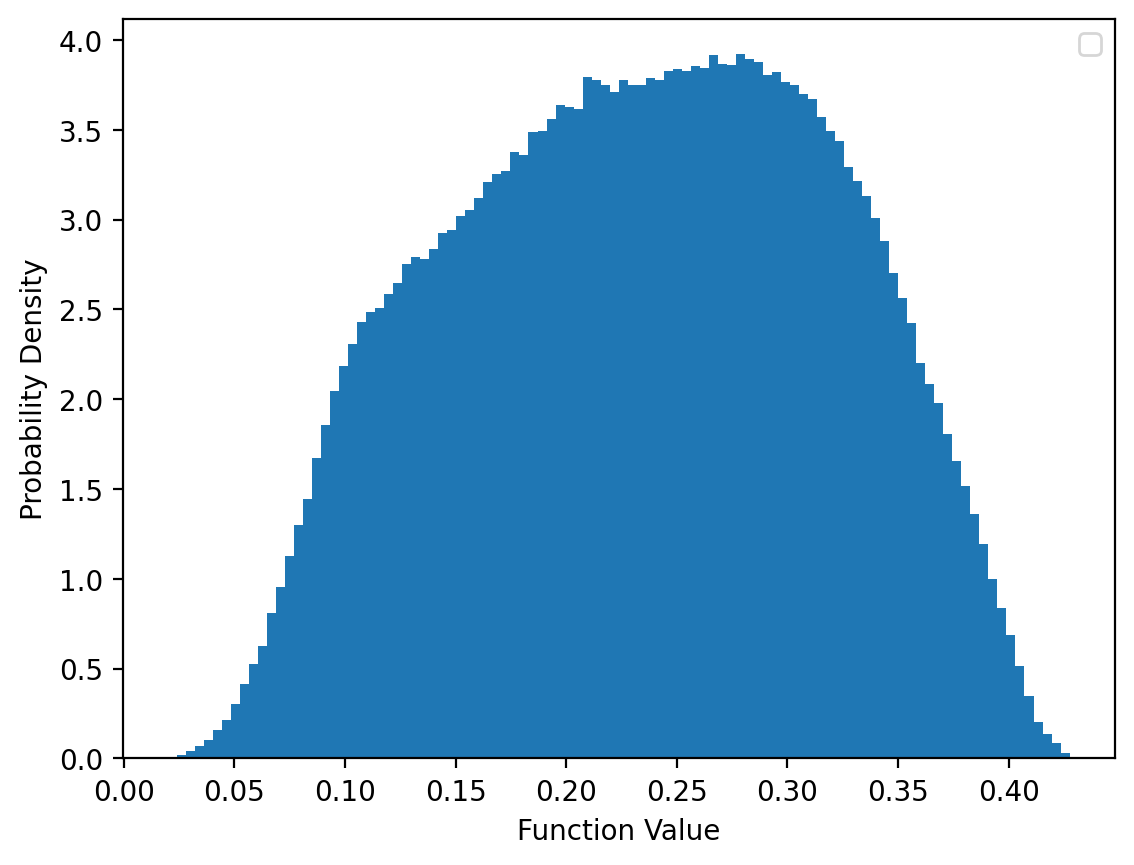

TRUE


Expanding Grid Size:   0%|          | 0/3 [00:00<?, ?it/s]

Number of Grid Points: 16


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


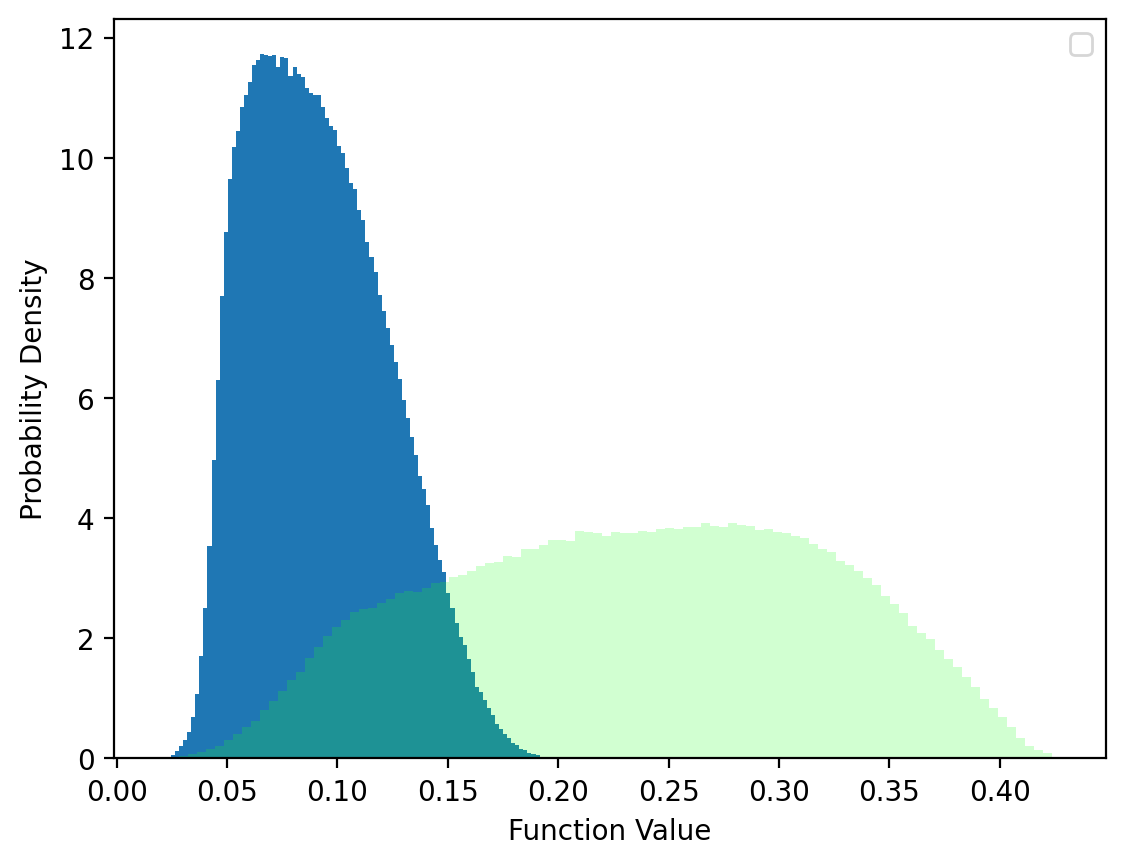

PLOT SLICES
d (200, 4)


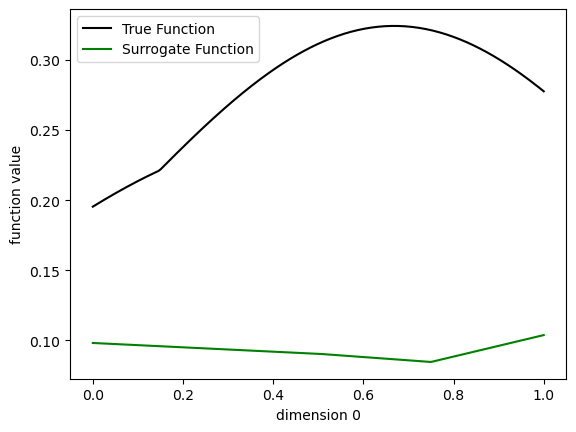

d (200, 4)


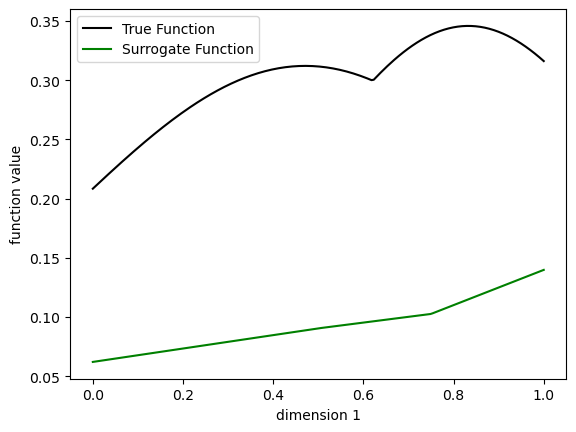

d (200, 4)


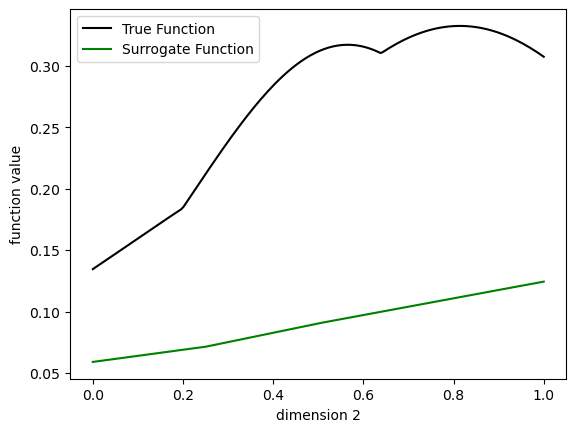

d (200, 4)


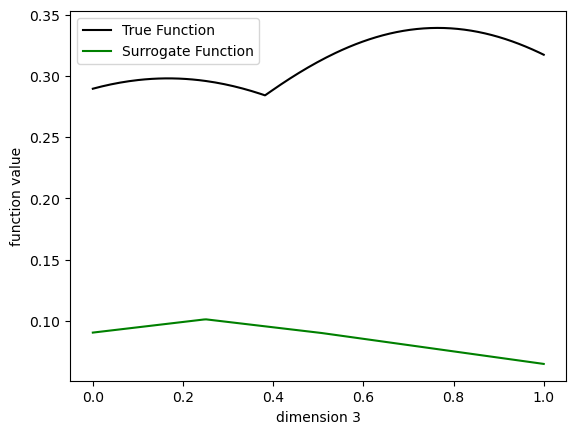

Expanding Grid Size:  33%|███▎      | 1/3 [00:02<00:04,  2.19s/it]

Number of Grid Points: 81


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


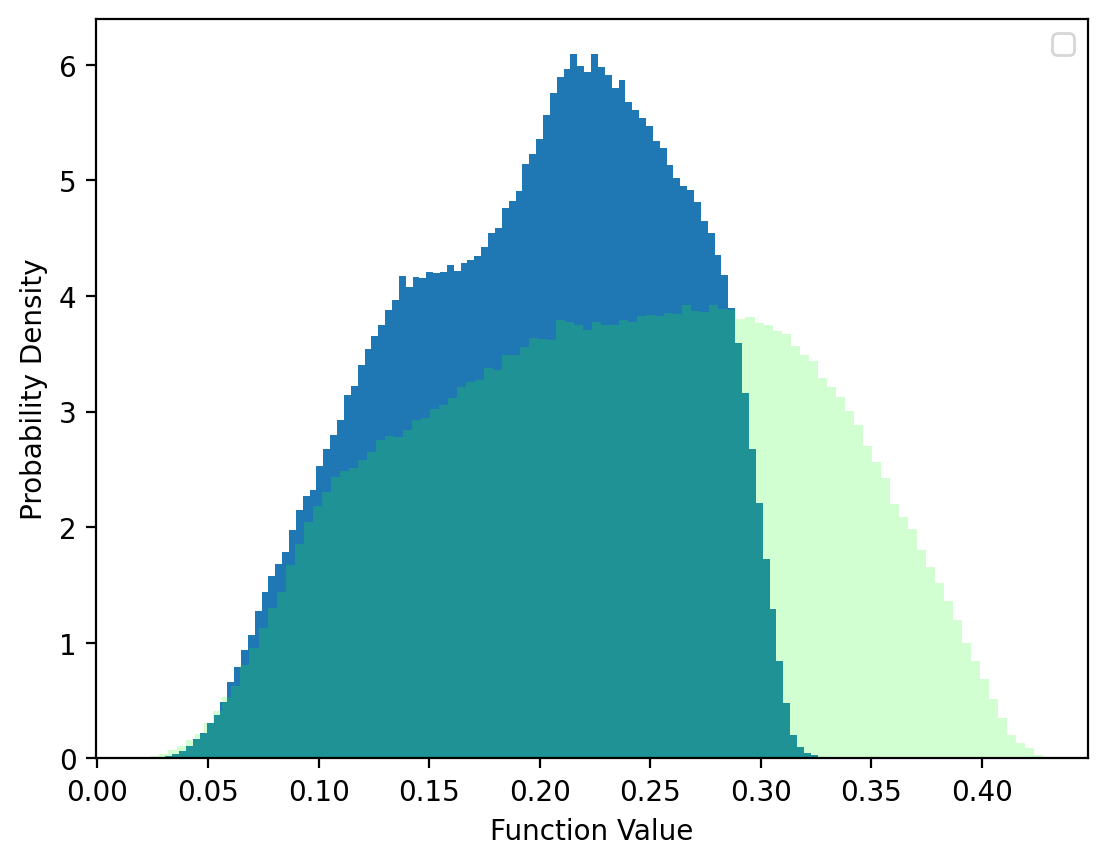

PLOT SLICES
d (200, 4)


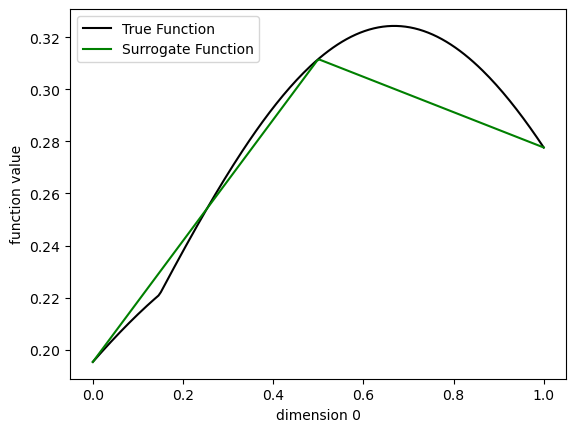

d (200, 4)


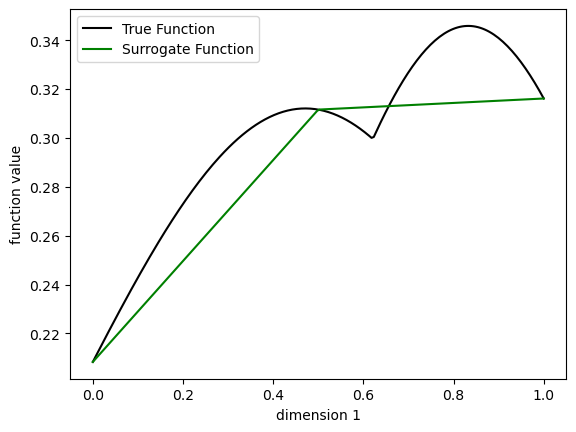

d (200, 4)


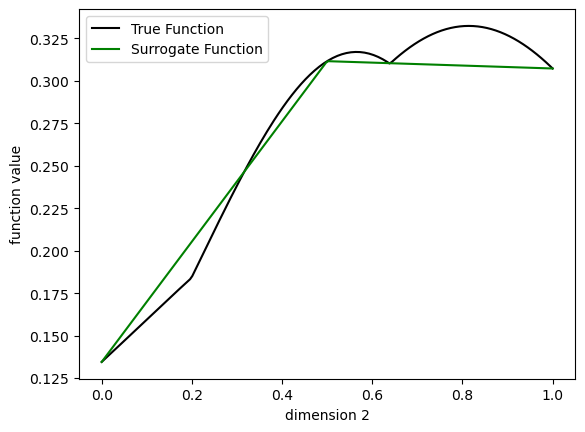

d (200, 4)


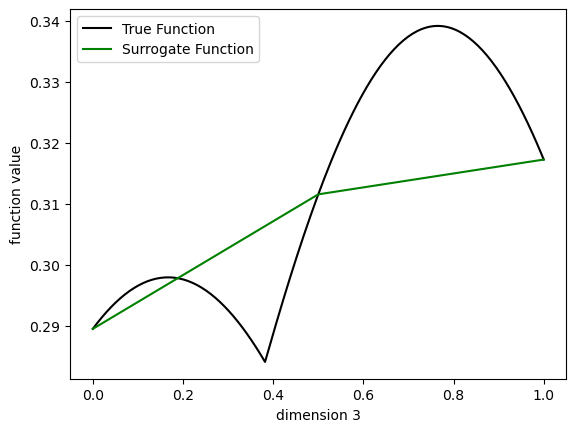

Expanding Grid Size:  67%|██████▋   | 2/3 [00:06<00:03,  3.47s/it]

Number of Grid Points: 256


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


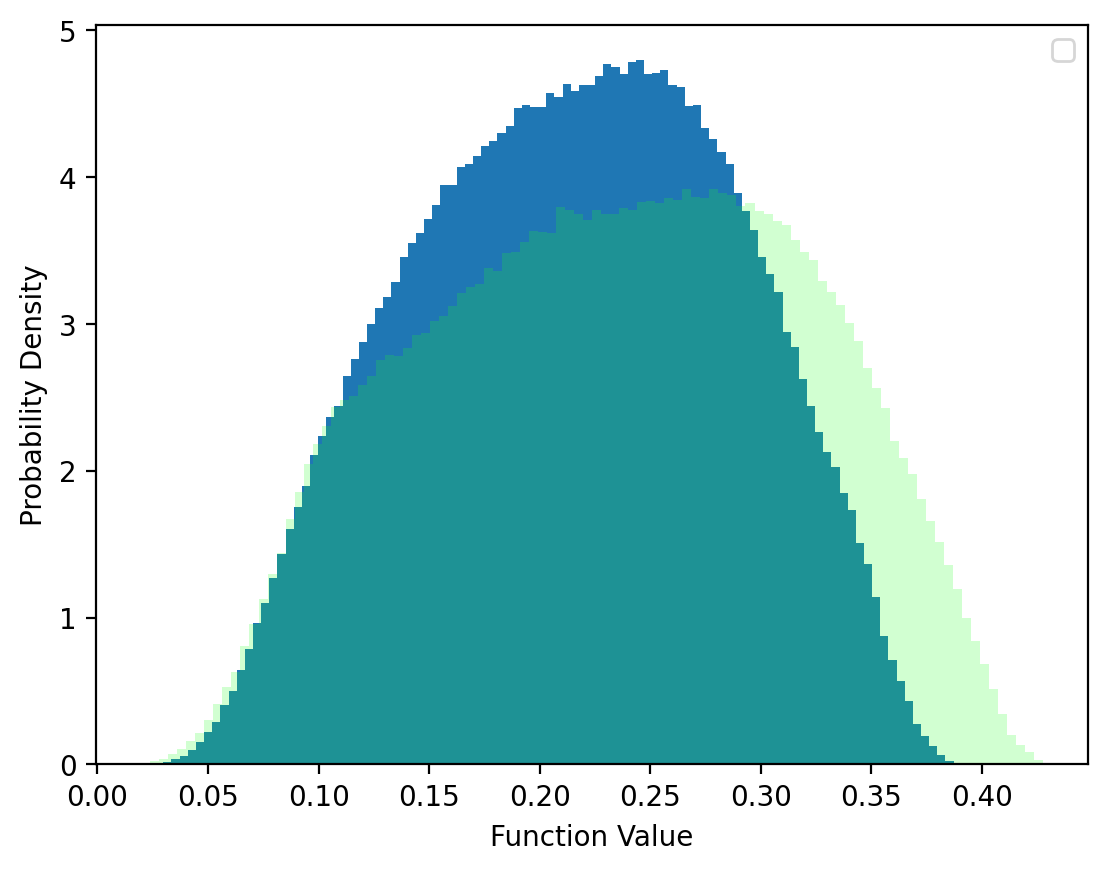

PLOT SLICES
d (200, 4)


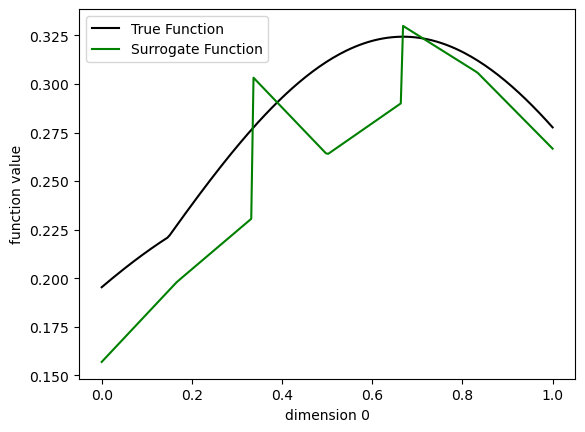

d (200, 4)


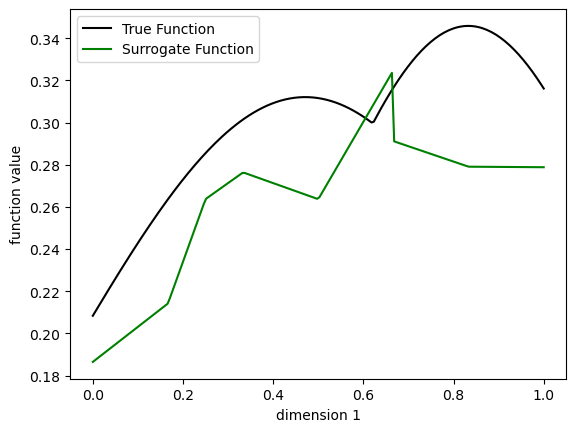

d (200, 4)


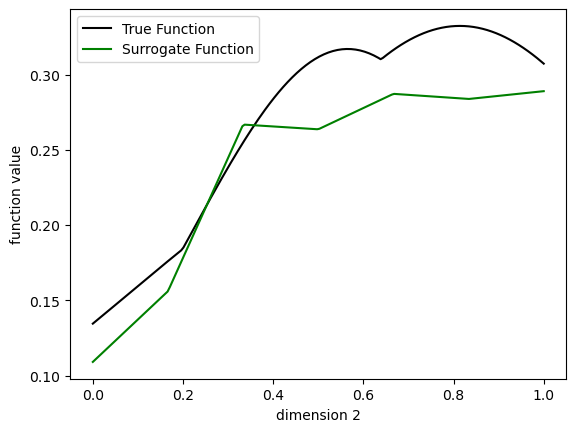

d (200, 4)


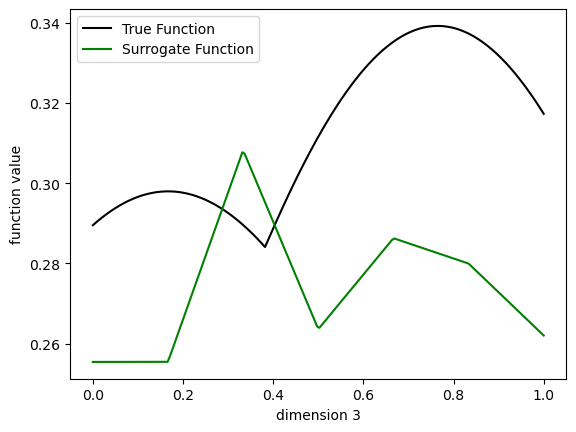

Expanding Grid Size: 100%|██████████| 3/3 [00:40<00:00, 13.62s/it]


In [ ]:
from GENE_ML.gene_ml.uncertianty_quantification.montecarlo import Montecarlo, relative_entropy
from scipy.interpolate import griddata
from GENE_ML.gene_ml.tools import plot_2D_of_many, plot_slices
from tqdm import tqdm
from GENE_ML.gene_ml.samplers.grid import Grid

num_dim = 4
num_gaussians = 5
bounds = [(0,1) for i in range(num_dim)]
mmg = MaxOfManyGaussians(num_dim, num_gaussians, bounds, std_bounds=(0.1,0.5), seed=42)

test_grid_size = 200

# for param, bound in zip(self.parameters,self.bounds):
#     x.append(np.linspace(*bound, self.num_samples_1D))
# X = np.meshgrid(*x)
# for param, Xi in zip(self.parameters,X):
#     samples[param] = Xi        
# samples_np = np.vstack([Xi.ravel() for Xi in X]).T


x = np.array([np.linspace(*b,test_grid_size) for b in bounds])
X = np.meshgrid(*x)
pos_test = np.vstack([Xi.ravel() for Xi in X]).T
Z_true = mmg.evaluate(pos_test)





grid_size_1d = np.arange(2,5)

rmse_grid = []

output_samples_previous = None
KL_div = []
num_bins = 100
mc_true = Montecarlo(mmg.evaluate)
print('TRUE')
mc_true.uniform_uq(num_samples=10**6, bounds=bounds, num_bins=num_bins)
print('TRUE')
for gs in tqdm(grid_size_1d, desc='Expanding Grid Size: '):
    print('Number of Grid Points:', gs**num_dim)
    x = np.array([np.linspace(*b,gs) for b in bounds])
    X = np.meshgrid(*x)
    pos_train = np.vstack([Xi.ravel() for Xi in X]).T
    z_train = mmg.evaluate(pos_train)
    Z_interpolate = griddata(pos_train, z_train, pos_test, method='linear')
    interpolate_fun = lambda pos: griddata(pos_train, z_train, pos, method='linear')
    mc_current = Montecarlo(interpolate_fun)
    mc_current.uniform_uq(num_samples=10**6, bounds=bounds)
    mc_current.plot_output_distribution(num_bins=100, overlay_dist_samples=mc_true.output_samples)
    # if type(output_samples_previous) == type(None):
    #     output_samples_previous = mc_current.output_samples
    # else:
    KL_div.append(relative_entropy(mc_current.output_samples, mc_true.output_samples, num_bins=num_bins))

    rmse_grid.append(np.sqrt(np.mean((Z_true - Z_interpolate)**2)))
    # plot_2D_of_many(function=interpolate_fun, bounds=bounds, nominals=[0.5,0.5],which2=[0,1], grid_size=200)
    plot_slices(mmg.evaluate, interpolate_fun, bounds=bounds)



/tmp/ipykernel_123147/3352694142.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


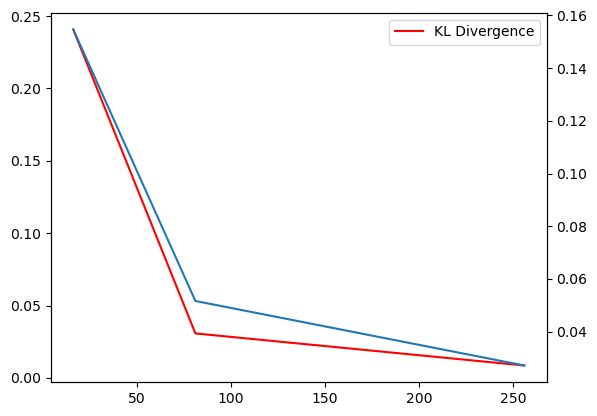

In [4]:
num_grid_points = grid_size_1d**num_dim
fig, ax = plt.subplots(1,1)
ax_t = ax.twinx()
ax.plot(num_grid_points,KL_div, color='red', label='KL Divergence')
ax_t.plot(num_grid_points, rmse_grid, label='Interpolator RMSE (right axis)')
ax.legend()
fig.show()

/tmp/ipykernel_89468/3352694142.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


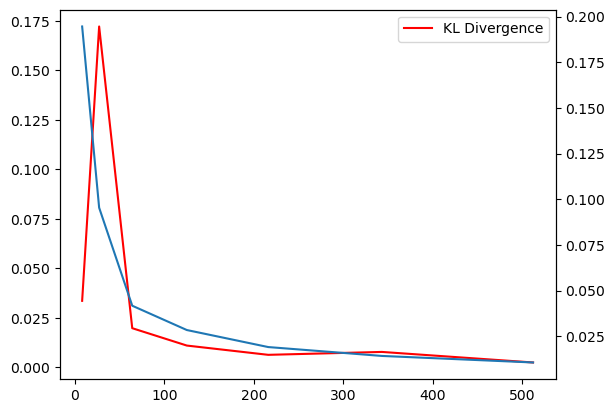

In [33]:
num_grid_points = grid_size_1d**num_dim
fig, ax = plt.subplots(1,1)
ax_t = ax.twinx()
ax.plot(num_grid_points,KL_div, color='red', label='KL Divergence')
ax_t.plot(num_grid_points, rmse_grid, label='Interpolator RMSE (right axis)')
ax.legend()
fig.show()

## Full Grid

TRUE


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


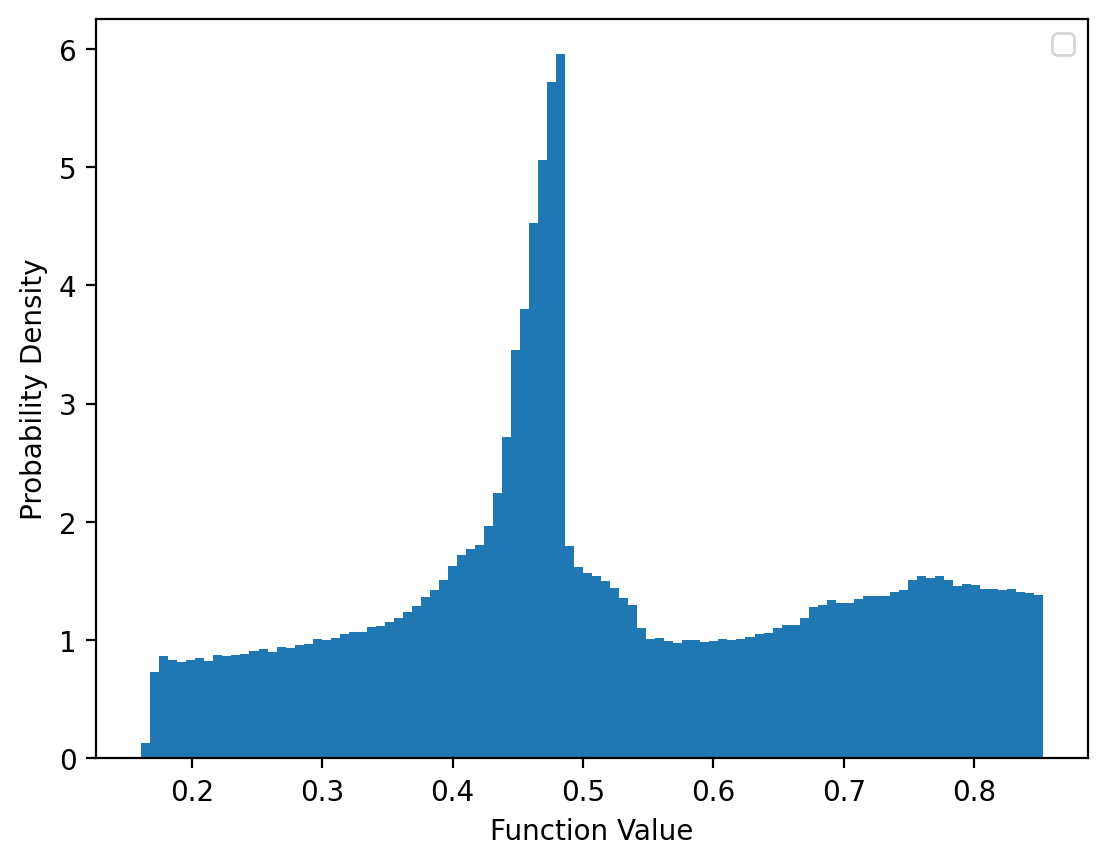

TRUE


Expanding Grid Size:   0%|          | 0/7 [00:00<?, ?it/s]

Number of Grid Points: 4


ValueError: operands could not be broadcast together with shapes (1,2) (3,) 

In [22]:
from GENE_ML.gene_ml.uncertianty_quantification.montecarlo import Montecarlo, relative_entropy
from scipy.interpolate import griddata
from GENE_ML.gene_ml.tools import plot_2D_of_many, plot_slices
from tqdm import tqdm

num_dim = 2
num_gaussians = 5
bounds = [(0,1) for i in range(num_dim)]
mmg = MaxOfManyGaussians(num_dim, num_gaussians, bounds, std_bounds=(0.1,0.5), seed=42)


grid_size_1d = np.arange(2,9)

test_grid_size = 500
x = np.linspace(0,1,test_grid_size)
y = np.linspace(0,1,test_grid_size)
X,Y = np.meshgrid(x,y)
pos_test = np.dstack((X, Y))
Z_true = mmg.evaluate(pos_test)
    
rmse_grid = []

output_samples_previous = None
KL_div = []
bounds = [(0,1),(0,1)]
num_bins = 100
mc_true = Montecarlo(mmg.evaluate)
print('TRUE')
mc_true.uniform_uq(num_samples=10**6, bounds=bounds, num_bins=num_bins)
print('TRUE')
for gs in tqdm(grid_size_1d, desc='Expanding Grid Size: '):
    print('Number of Grid Points:', gs**2)
    x = np.linspace(0,1,gs)
    y = np.linspace(0,1,gs)

    px, py, z_train = [], [], []
    for xi in x:
        for yi in y:
            px.append(xi)
            py.append(yi)
            z_train.append(mmg_wraped.eval((xi,yi)))

    Z_interpolate = griddata((px,py), z_train, (X, Y), method='cubic')
    interpolate_fun = lambda pos: griddata((px,py), z_train, pos, method='cubic')
    mc_current = Montecarlo(interpolate_fun)
    mc_current.uniform_uq(num_samples=10**6, bounds=bounds)
    mc_current.plot_output_distribution(num_bins=100, overlay_dist_samples=mc_true.output_samples)
    if type(output_samples_previous) == type(None):
        output_samples_previous = mc_current.output_samples
    else:
        KL_div.append(relative_entropy(mc_current.output_samples, output_samples_previous, num_bins=num_bins))

    Z_true = mmg.evaluate(pos_test)
    rmse_grid.append(np.sqrt(np.mean((Z_true - Z_interpolate)**2)))
    # plot_2D_of_many(function=interpolate_fun, bounds=bounds, nominals=[0.5,0.5],which2=[0,1], grid_size=200)
    plot_slices(mmg.evaluate, interpolate_fun, bounds=bounds)



/tmp/ipykernel_8593/1201765399.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


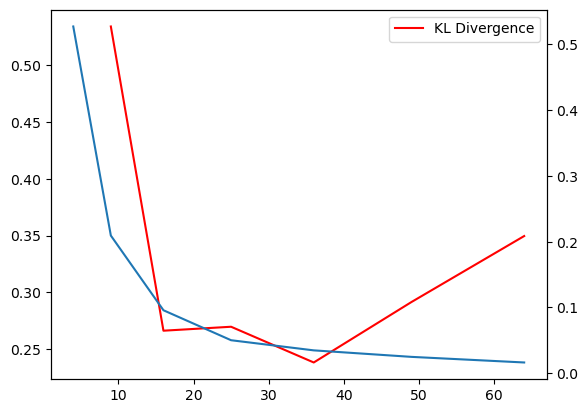

In [7]:
num_grid_points = grid_size_1d**2
fig, ax = plt.subplots(1,1)
ax_t = ax.twinx()
ax.plot(num_grid_points[1:],KL_div, color='red', label='KL Divergence')
ax_t.plot(num_grid_points, rmse_grid, label='Interpolator RMSE (right axis)')
ax.legend()
fig.show()

In [37]:
KL_div

[0.3937928160935814, 0.09893202633840278]

In [9]:
print(len(mc_current.output_samples))
print(10**6)

1000000
1000000


# SparseSpACE

There are many more functions pre-defined in Function.py. It is also possible to compose functions and create combined and scaled functions.

## Standard Combination Technique

So now let's first look at the Truncated Combination Technique with a predefined maximum und minimum level and let's integrate the GenzCornerPeak from before with it. For this purpose we also have to select a grid on which we want to perform the combi. We will use here the equidistant Trapezoidal grid that applies the trapezoidal rule to integrate the function. There are more grids available such as Leja, Clenshaw-Curtis, Gauss-Legendre...

Time used (s):0.0009317470012319973
Number of distinct points used during the refinement (StdCombi): 9
Time used (s):0.0008096440014924156
Number of distinct points used during the refinement (StdCombi): 9
Time used (s):0.0015990020001481753
Number of distinct points used during the refinement (StdCombi): 25
Time used (s):0.0051059289999102475
Number of distinct points used during the refinement (StdCombi): 81
81 81


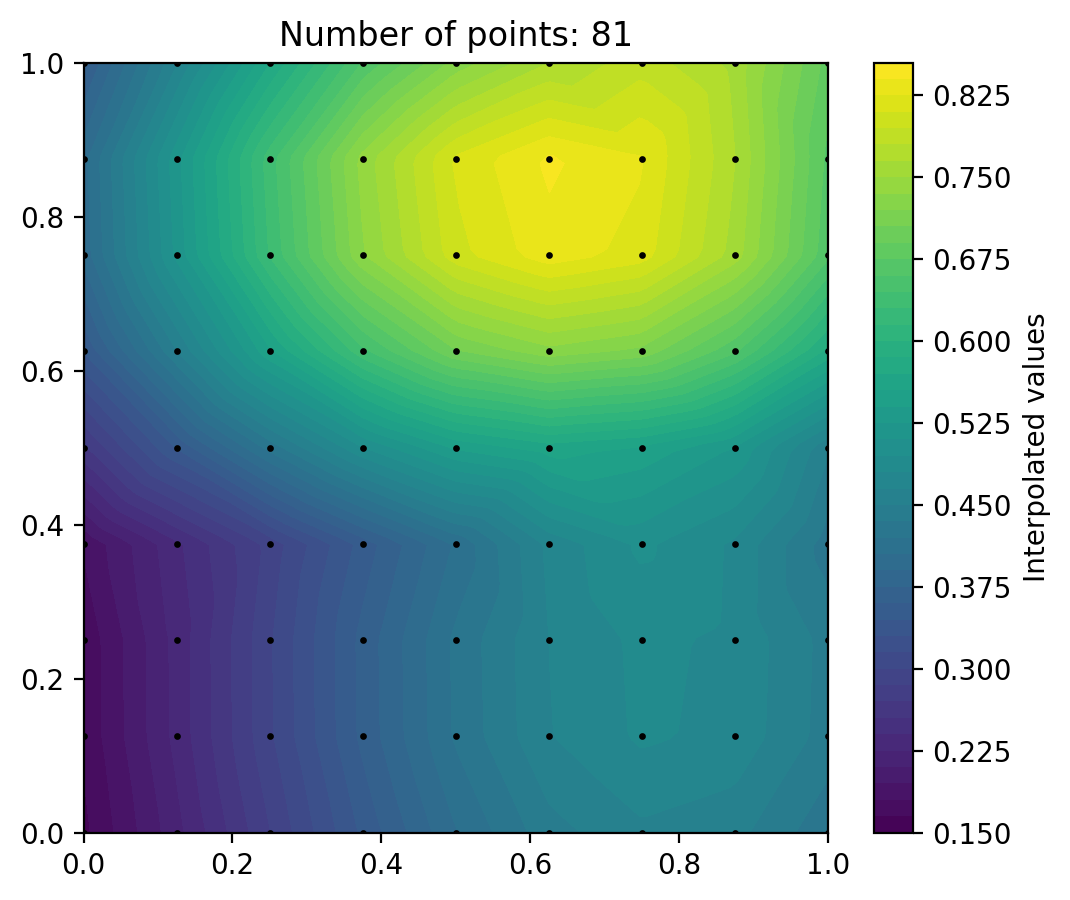

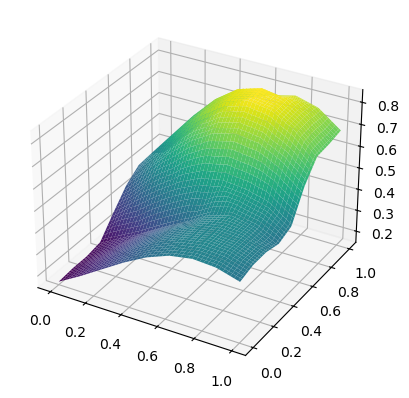

In [3]:
%matplotlib inline
import sparseSpACE
from sparseSpACE.Function import *
from sparseSpACE.StandardCombi import *
from sparseSpACE.Grid import *
import numpy as np
dim = 2
# coeffs = np.ones(dim)
a = np.zeros(dim)
b = np.ones(dim)
grid = TrapezoidalGrid(a=a, b=b, boundary=True)
f = mmg_wraped#GenzCornerPeak(coeffs=coeffs)
# NEW! define operation which shall be performed in the combination technique
from sparseSpACE.GridOperation import *
operation = Integration(f=f, grid=grid, dim=dim)#, reference_solution = f.getAnalyticSolutionIntegral(a,b))
combiObject = StandardCombi(a, b, operation=operation)
minimum_level = 1
maximum_level = 1

combiObject.perform_operation(minimum_level, maximum_level)
# print("Combination Scheme:")
# combiObject.print_resulting_combi_scheme(markersize=5)
# print("Sparse Grid:")
# combiObject.print_resulting_sparsegrid(markersize=10)
# print("Plot of combimodel for function:")
# combiObject.plot()

levels = np.arange(3)+1
combi_points = []
combi_npoints_array = []
for l in levels:
    combiObject.perform_operation(l,l)
    combi_points.append(combiObject.get_points())
    combi_npoints_array.append(combiObject.get_total_num_points())

from scipy.interpolate import griddata


points = combi_points[-1]#combiObject.get_points()
p_a = np.array(points)

px, py = zip(*points) 
print(len(px), len(py))
pf = [f.eval(p) for p in points]

x = np.linspace(0,1,100)
y = np.linspace(0,1,100)
X,Y = np.meshgrid(x,y)
Z = griddata((px, py), pf, (X, Y), method='linear')

size=1
fig = plt.figure(figsize=(6*size,5*size), dpi = 200)
plt.title(f'Number of points: {combiObject.get_total_num_points()}')
plt.contourf(X,Y,Z, levels=50, cmap='viridis')
plt.colorbar(label='Interpolated values')
plt.scatter(px,py,s=2, c='black')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')



In [4]:
len(combi_points)

3

The output shows the combination Scheme that is used which defines the level vectors and the coefficients of the grids. Then the solution of the combination integral is listed followed by the analytic solution and the absolute error. Finally the graphical plot of the combination scheme and the resulting sparse grid is shown.

## Dimension Adaptive Combination Technique

An often used variant of the Standard Combination Technique is the dimension adaptive Combination Technique. An implementation which applies this method is now available within the framework. It is called similarly to the Standard Combination Technique but now we also have to define a tolerance to indicate how long we want to adapt the scheme. The adaptation stops once the relative error of the integration falls below this tolerance threshold.

In [5]:
# #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! DOES NOT WORK BECAUSE IT NEEDS AN ANALYTICAL SOLUTION OF THE INTEGRAL. MAYBE TRY ANOTHER OPERATION IF DIMENSIONAL ADAPTIVITY IS DESIRED

# %matplotlib inline
# import sparseSpACE
# from sparseSpACE.Function import *
# from sparseSpACE.DimAdaptiveCombi import *
# from sparseSpACE.Grid import *
# import numpy as np
# dim = 2
# coeffs = [1, 100]
# a = np.zeros(dim)
# b = np.ones(dim)
# grid = TrapezoidalGrid(a=a, b=b)
# f = mmg_wraped#GenzCornerPeak(coeffs=coeffs)
# from sparseSpACE.GridOperation import *
# operation = Integration(f=f, grid=grid, dim=dim)#, reference_solution = f.getAnalyticSolutionIntegral(a,b))
# combiObject = DimAdaptiveCombi(a, b, operation)
# minimum_level = 1
# maximum_level = 2
# combiObject.perform_combi(minimum_level, maximum_level, 10**-2)
# # combiObject.print_resulting_combi_scheme(markersize=5)
# # combiObject.print_resulting_sparsegrid(markersize=10)

# from scipy.interpolate import griddata
# points = combiObject.get_points()
# p_a = np.array(points)


# px, py = zip(*points) 
# print(len(px), len(py))
# pf = [f.eval(p) for p in points]

# x = np.linspace(0,1,100)
# y = np.linspace(0,1,100)
# X,Y = np.meshgrid(x,y)
# Z = griddata((px, py), pf, (X, Y), method='linear')

# size=2
# fig = plt.figure(figsize=(6*size,5*size))
# plt.title(f'Number of points: {len(px)}')
# plt.contourf(X,Y,Z, levels=50, cmap='viridis')
# plt.colorbar(label='Interpolated values')
# plt.scatter(px,py,s=2, c='white')

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(X, Y, Z, cmap='viridis')


## SpatiallyAdaptiveCombi

Now we come to the core element of this framework: The spatially adaptive Combination Technique. Here several techniques are implemented and can be tested for all test functions. After configuring the grid, the function, and the dimension we need to create the object for the respective strategy (currently we have the $\textit{SpatiallyAdaptiveFixedScheme}$, the $SpatiallyAdaptiveExtendScheme$, the $SpatiallyAdaptiveCellScheme$ and the  $SpatiallyAdaptiveSingleDimensions$). The different Schemes have different configuration parameters one can choose. For further information have a look in the respective class file. The calling conventions for the spatially adaptive combi slightly differe from those of the standard combis and also include and $errorOperator$ which controls the error estimations and we also have the oportunity to plot the sparse grid and the combination scheme after each refinement step by setting $do\_plot$ to $true$. In the following we will demonstrate the refinement for to schemes including the respective plots.

## Cell Scheme

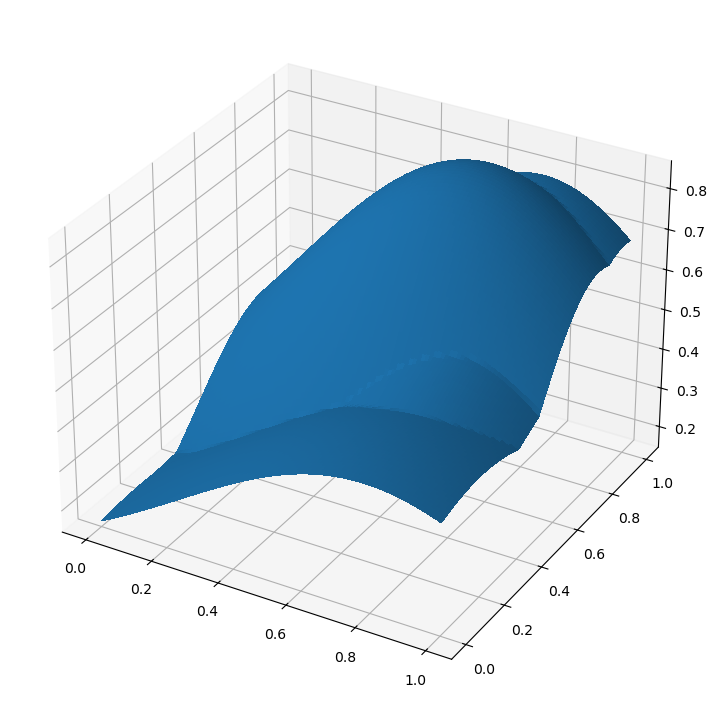

0 [1, 4] 1.0
1 [2, 3] 1.0
2 [3, 2] 1.0
3 [4, 1] 1.0
4 [1, 3] -1.0
5 [2, 2] -1.0
6 [3, 1] -1.0
split dimension 0
split dimension 1
Current number of function evaluations 9
combiintegral: 3.278746055922796
Current error: 3.2787460559227943
Finished refinement
Refined 1 times
Current number of function evaluations 13
combiintegral: 3.45566304528235
Current error: 3.4556630452823454
Finished refinement
Refined 2 times
Current number of function evaluations 19
combiintegral: 3.6140002322570304
Current error: 3.6524223048678026
Finished refinement
Refined 1 times
Current number of function evaluations 21
combiintegral: 3.5823277780501575
Current error: 3.704186977386435
Finished refinement
Refined 4 times
Current number of function evaluations 27
combiintegral: 3.628739867978602
Current error: 3.750599067314881
Finished refinement
Refined 2 times
Current number of function evaluations 32
combiintegral: 3.650181411301413
Current error: 3.772040610637693
Finished refinement
Refined 4 times
Cur

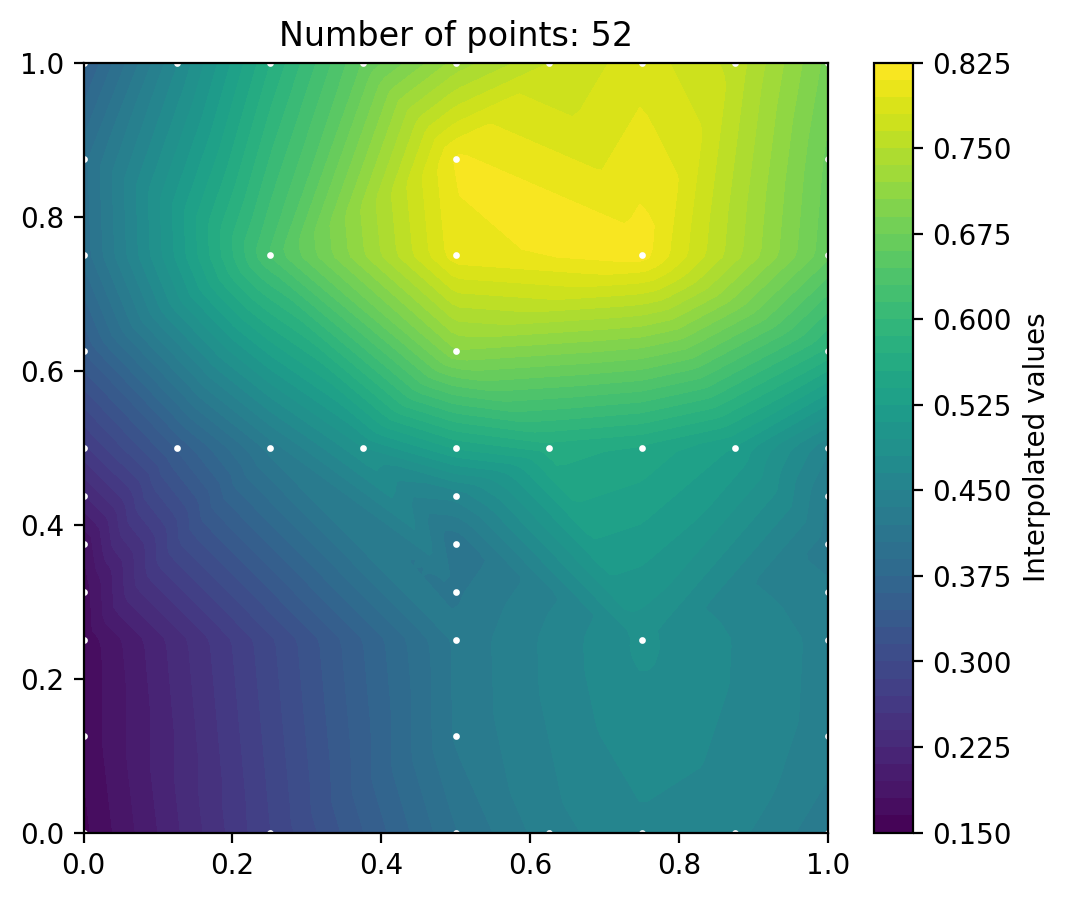

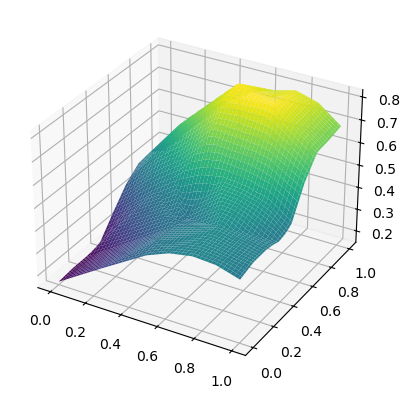

In [6]:
%matplotlib inline
import sparseSpACE
import numpy as np
from sparseSpACE.spatiallyAdaptiveCell import *
from sparseSpACE.Function import *
from sparseSpACE.ErrorCalculator import *

#dimension of the problem
dim = 2

# define integration domain boundaries
a = np.zeros(dim)
b = np.ones(dim)

# define function to be integrated
# midpoint = np.ones(dim) * 0.5
# coefficients = np.array([ 10**0 * (d+1) for d in range(dim)])
f = mmg_wraped#GenzDiscontinious(border=midpoint,coeffs=coefficients)
# plot function
f.plot(np.ones(dim)*a,np.ones(dim)*b)

# reference integral solution for calculating errors
# reference_solution = f.getAnalyticSolutionIntegral(a,b)

# define error estimator for refinement
errorOperator=ErrorCalculatorSurplusCell()

# define equidistant grid
grid=TrapezoidalGrid(a=a, b=b)

# NEW! define operation which shall be performed in the combination technique
from sparseSpACE.GridOperation import *
operation = Integration(f=f, grid=grid, dim=dim)#, reference_solution = reference_solution)

# define Cell refinement strategy for Spatially Adaptive Combination Technique
adaptiveCombiInstanceCell = SpatiallyAdaptiveCellScheme(a, b, operation=operation)

# the cell method does not have component grids and therefore the sparse grid is printed twice per iteration!
# performing the spatially adaptive refinement with the Cell method
adaptiveCombiInstanceCell.performSpatiallyAdaptiv(1, 4, errorOperator, max_evaluations=50, do_plot=False, do_last_plot=False)

print("Number of points used in refinement:", adaptiveCombiInstanceCell.get_total_num_points())


from scipy.interpolate import griddata
cell_points = adaptiveCombiInstanceCell.points_inevery_step#adaptiveCombiInstanceCell.get_points()
cell_npoints_array = adaptiveCombiInstanceCell.num_point_array
points = adaptiveCombiInstanceCell.points_inevery_step[-1]
p_a = np.array(points)


px, py = zip(*points) 
print(len(px), len(py))
print('debug', np.max(px),np.max(py))
pf = [f.eval(p) for p in points]

x = np.linspace(0,1,100)
y = np.linspace(0,1,100)
X,Y = np.meshgrid(x,y)
Z = griddata((px, py), pf, (X, Y), method='linear')

size=1
fig = plt.figure(figsize=(6*size,5*size), dpi = 200)
plt.title(f'Number of points: {adaptiveCombiInstanceCell.get_total_num_points()}')
plt.contourf(X,Y,Z, levels=50, cmap='viridis')
plt.colorbar(label='Interpolated values')
plt.scatter(px,py,s=2, c='white')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')


In [22]:
cell_points[1].shape

(13, 2)

## Extend Scheme

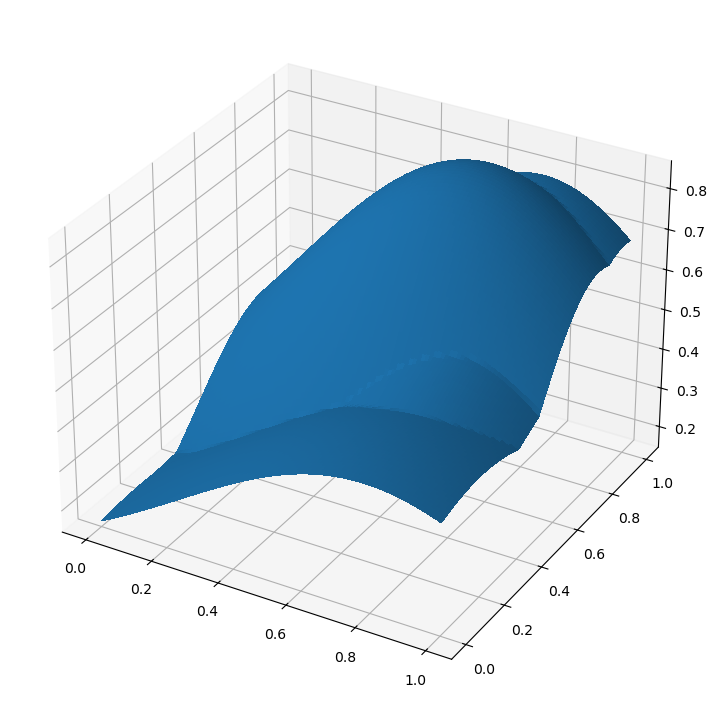

0 [1, 4] 1.0
1 [2, 3] 1.0
2 [3, 2] 1.0
3 [4, 1] 1.0
4 [1, 3] -1.0
5 [2, 2] -1.0
6 [3, 1] -1.0
Current number of function evaluations 113
combiintegral: 0.5219862406574551
Current error: 0.009869635675419902
Number of refinements: 0
Number of distinct points used during the refinement: 113
Time used adaptive (s): 0.10023019400068733
Final error: 0.009869635675419902
Number of points used in refinement: 113
113 113


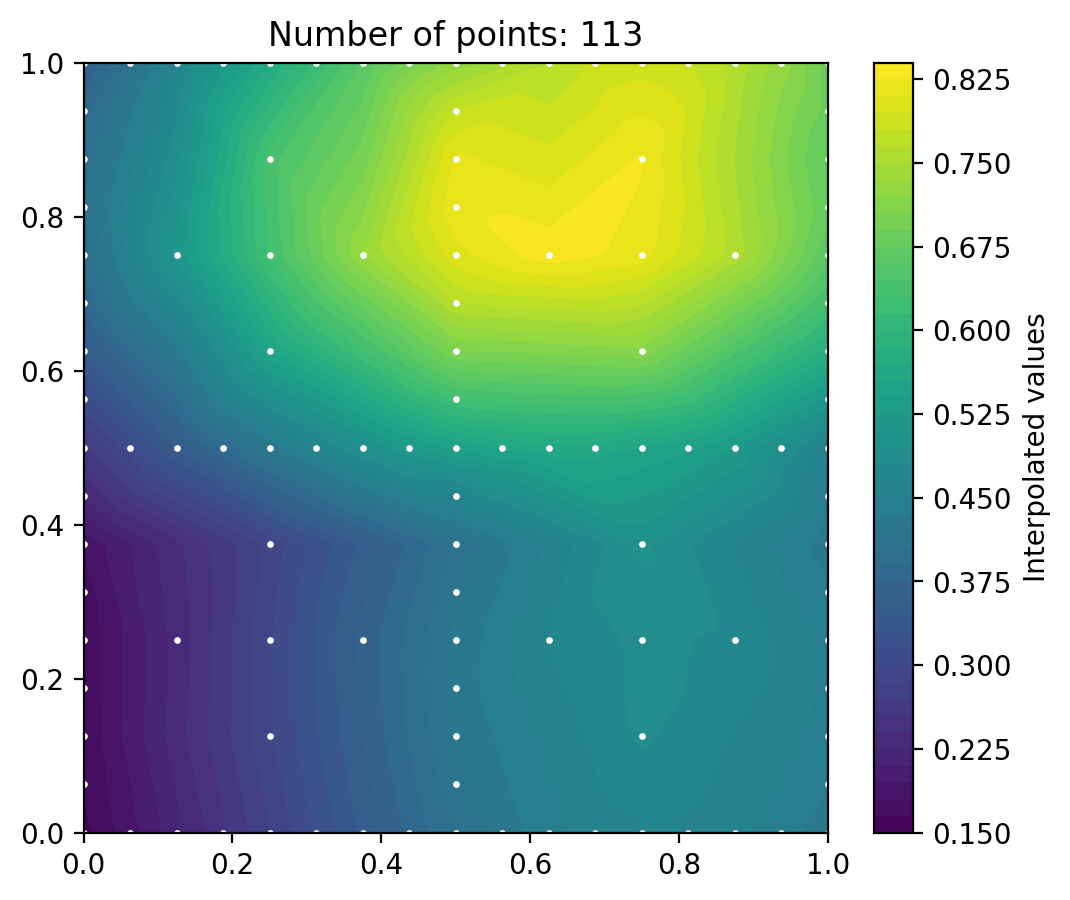

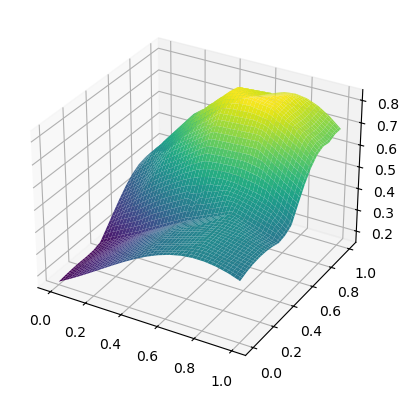

In [7]:
%matplotlib inline
import sparseSpACE
import numpy as np
from sparseSpACE.spatiallyAdaptiveExtendSplit import *
from sparseSpACE.Function import *
from sparseSpACE.ErrorCalculator import *

# dimension of the problem
dim = 2

# define integration domain boundaries
a = np.zeros(dim)
b = np.ones(dim)

# define function to be integrated
# midpoint = np.ones(dim) * 0.5
# coefficients = np.array([ 10**0 * (d+1) for d in range(dim)])
f = mmg_wraped#GenzDiscontinious(border=midpoint,coeffs=coefficients)
# plot function
f.plot(np.ones(dim)*a,np.ones(dim)*b)

# reference integral solution for calculating errors
# reference_solution = f.getAnalyticSolutionIntegral(a,b)

# define error estimator for refinement
errorOperator2=ErrorCalculatorExtendSplit()

# define equidistant grid
grid=TrapezoidalGrid(a=a, b=b)

# NEW! define operation which shall be performed in the combination technique
from sparseSpACE.GridOperation import *
operation = Integration(f=f, grid=grid, dim=dim)#, reference_solution = reference_solution)

# define Extend-Split refinement strategy for Spatially Adaptive Combination Technique
adaptiveCombiInstanceExtend = SpatiallyAdaptiveExtendScheme(a, b, 3, version=0, operation=operation)

# performing the spatially adaptive refinement with the Extend-Split method
adaptiveCombiInstanceExtend.performSpatiallyAdaptiv(1, 4, errorOperator2, max_evaluations=50, do_plot=False, do_last_plot=False)

print("Number of points used in refinement:", adaptiveCombiInstanceExtend.get_total_num_points())


from scipy.interpolate import griddata
extend_points = adaptiveCombiInstanceExtend.points_inevery_step
extend_npoints_array = adaptiveCombiInstanceExtend.num_point_array
points = adaptiveCombiInstanceExtend.points_inevery_step[-1]#adaptiveCombiInstanceCell.get_points()
p_a = np.array(points)


px, py = zip(*points) 
print(len(px), len(py))
pf = [f.eval(p) for p in points]

x = np.linspace(0,1,100)
y = np.linspace(0,1,100)
X,Y = np.meshgrid(x,y)
Z = griddata((px, py), pf, (X, Y), method='linear')

size=1
fig = plt.figure(figsize=(6*size,5*size), dpi=200)
plt.title(f'Number of points: {adaptiveCombiInstanceExtend.get_total_num_points(distinct_function_evals=True)}')
plt.contourf(X,Y,Z, levels=50, cmap='viridis')
plt.colorbar(label='Interpolated values')
plt.scatter(px,py,s=2, c='white')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

## Single Dim Scheme

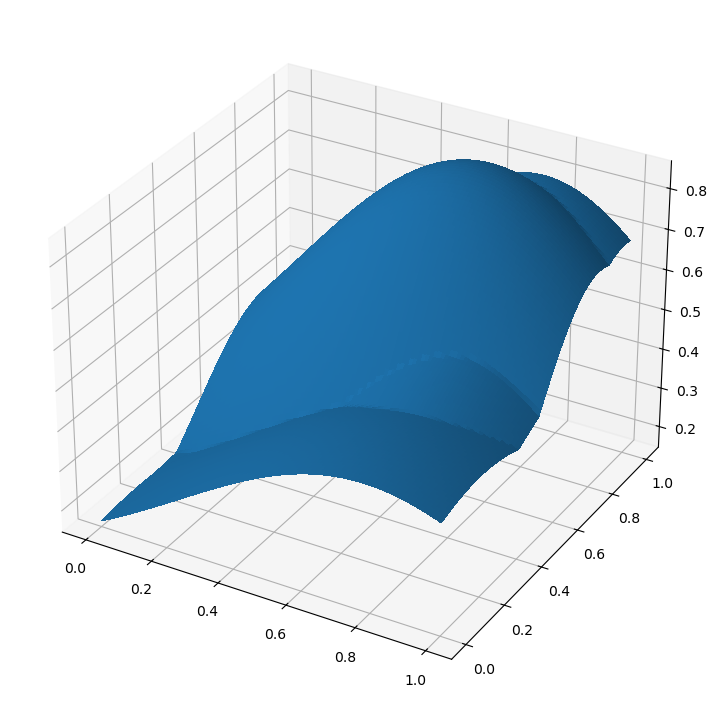

0 [1, 6] 1.0
1 [2, 5] 1.0
2 [3, 4] 1.0
3 [4, 3] 1.0
4 [5, 2] 1.0
5 [6, 1] 1.0
6 [1, 5] -1.0
7 [2, 4] -1.0
8 [3, 3] -1.0
9 [4, 2] -1.0
10 [5, 1] -1.0
Current number of function evaluations 577
combiintegral: 0.5224496858454075
Current error: 0.0003397480185512239
Number of refinements: 0
Number of distinct points used during the refinement: 577
Time used adaptive (s): 0.8133950680003181
Final error: 0.0003397480185512239
Number of points used in refinement: 577
unique (577, 2) (577, 2)
577 577


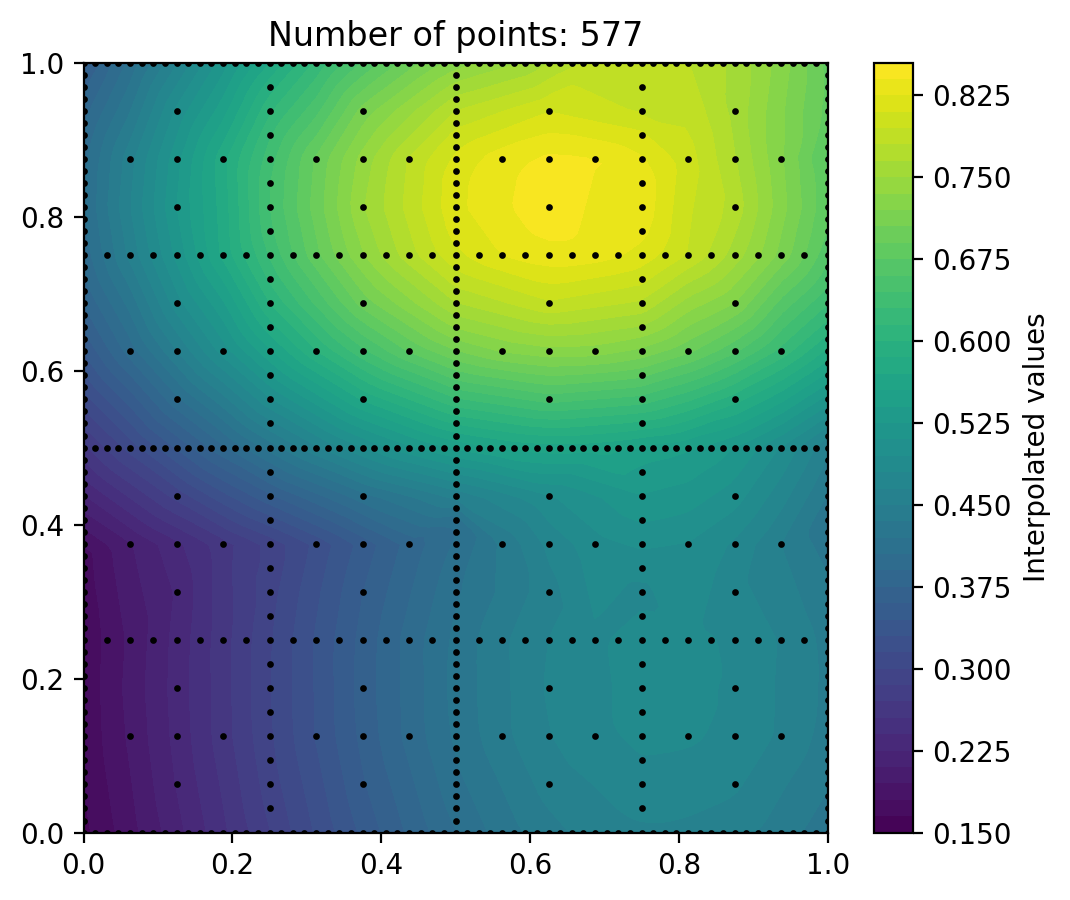

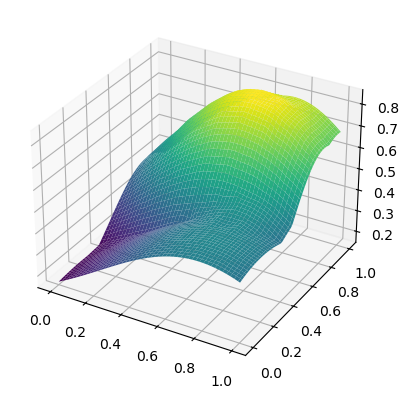

In [27]:
%matplotlib inline
import sparseSpACE
import numpy as np
from sparseSpACE.spatiallyAdaptiveSingleDimension2 import *
from sparseSpACE.Function import *
from sparseSpACE.ErrorCalculator import *

# dimension of the problem
dim = 2

# define integration domain boundaries
a = np.zeros(dim)
b = np.ones(dim)

# define function to be integrated
# midpoint = np.ones(dim) * 0.5
# coefficients = np.array([ 10**0 * (d+1) for d in range(dim)])
f = mmg_wraped#GenzDiscontinious(border=midpoint,coeffs=coefficients)
# plot function
f.plot(np.ones(dim)*a,np.ones(dim)*b)

# reference integral solution for calculating errors
# reference_solution = f.getAnalyticSolutionIntegral(a,b)

# define error estimator for refinement
errorOperator = ErrorCalculatorSingleDimVolumeGuided()

# define equidistant grid
grid=GlobalTrapezoidalGrid(a=a, b=b, modified_basis=False, boundary=True)

# NEW! define operation which shall be performed in the combination technique
from sparseSpACE.GridOperation import *
operation = Integration(f=f, grid=grid, dim=dim)#, reference_solution=reference_solution)

# define SingleDim refinement strategy for Spatially Adaptive Combination Technique
adaptiveCombiInstanceSingleDim = SpatiallyAdaptiveSingleDimensions2(np.ones(dim) * a, np.ones(dim) * b, operation=operation)

# performing the spatially adaptive refinement with the SingleDim method
adaptiveCombiInstanceSingleDim.performSpatiallyAdaptiv(1, 6, errorOperator, max_evaluations=100, do_plot=False, do_last_plot=False)

print("Number of points used in refinement:", adaptiveCombiInstanceSingleDim.get_total_num_points())

from scipy.interpolate import griddata
sdim_points = adaptiveCombiInstanceSingleDim.points_inevery_step 
sdim_npoints_array = adaptiveCombiInstanceSingleDim.num_point_array
points = adaptiveCombiInstanceSingleDim.points_inevery_step[-1]#adaptiveCombiInstanceCell.get_points()
p_a = np.array(points)
pp = np.unique(p_a, axis=0)
print('unique', p_a.shape, pp.shape)


px, py = zip(*points) 
print(len(px), len(py))
pf = [f.eval(p) for p in points]

x = np.linspace(0,1,100)
y = np.linspace(0,1,100)
X,Y = np.meshgrid(x,y)
Z = griddata((px, py), pf, (X, Y), method='linear')

size=1
fig = plt.figure(figsize=(6*size,5*size), dpi=200)
plt.title(f'Number of points: {len(px)}')
plt.contourf(X,Y,Z, levels=50, cmap='viridis')
plt.colorbar(label='Interpolated values')
plt.scatter(px,py,s=2, c='black')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

In [29]:
sdim_points[1].shape

IndexError: list index out of range

In [42]:
from GENE_ML.gene_ml.models.GPR import GPR

gpr_overfit = GPR('mmmg', num_dim, 'radial_basis_function', do_overfit=True)

        
x_train = np.array(points)
print(x_train.shape) 
z_train = mmg.evaluate(x_train)
print(z_train.shape)

gpr_overfit.fit(x_train, z_train)
print(gpr_overfit.regressor.kern)

x = np.linspace(0,1,test_grid_size)
y = np.linspace(0,1,test_grid_size)
X,Y = np.meshgrid(x,y)
pos_test = np.dstack((X, Y))
pos_test_flat = np.vstack([X.ravel(), Y.ravel()]).T

Z_true = mmg.evaluate(pos_test_flat)
Z_interpolate = gpr_overfit.predict(pos_test_flat, disclude_errors=True)

print(Z_interpolate)

(113, 2)
(113,)
2
  rbf.         |               value  |  constraints  |  priors
  variance     |  0.8346190359872924  |      +ve      |        
  lengthscale  |              0.0625  |      +ve      |        
[0.16075958 0.16828708 0.17413963 ... 0.72142584 0.70743824 0.6845856 ]


In [11]:
from GENE_ML.gene_ml.models.GPR import GPR

gpr_overfit = GPR('mmmg', num_dim, 'radial_basis_function', do_overfit=True)

        
x_train = np.array(points)
print(x_train.shape) 
z_train = mmg.evaluate(x_train)
print(z_train.shape)

gpr_overfit.fit(x_train, z_train)
print(gpr_overfit.regressor.kern)

x = np.linspace(0,1,test_grid_size)
y = np.linspace(0,1,test_grid_size)
X,Y = np.meshgrid(x,y)
pos_test = np.dstack((X, Y))
pos_test_flat = np.vstack([X.ravel(), Y.ravel()]).T

Z_true = mmg.evaluate(pos_test_flat)
Z_interpolate = gpr_overfit.predict(pos_test_flat, disclude_errors=True)

print(Z_interpolate)

(113, 2)
(113,)
2
  rbf.         |               value  |  constraints  |  priors
  variance     |  0.8346190359872924  |      +ve      |        
  lengthscale  |              0.0625  |      +ve      |        
[0.16075958 0.16828708 0.17413963 ... 0.72142584 0.70743824 0.6845856 ]


##  Comparison: RMSE, Integral Accuracy, Sobel Index Accuracy

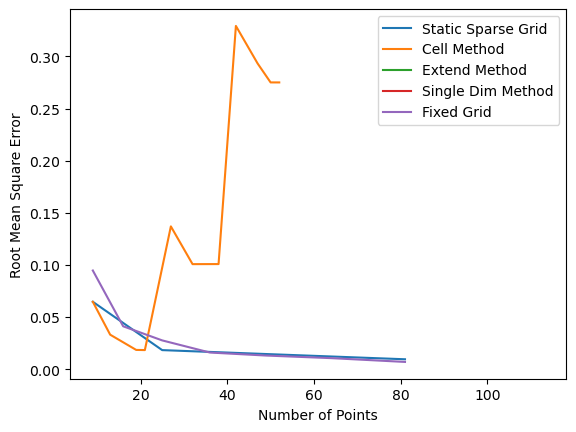

In [15]:
from scipy.interpolate import griddata
from GENE_ML.gene_ml.models.GPR import GPR

gpr_overfit = GPR('mmmg', num_dim, 'radial_basis_function', do_overfit=True)

points_by_method = [combi_points, cell_points, extend_points, sdim_points]
num_points_by_method = [combi_npoints_array, cell_npoints_array, extend_npoints_array, sdim_npoints_array]
method_names = ['Static Sparse Grid', 'Cell Method', 'Extend Method', 'Single Dim Method']
rmse_by_method = []
test_grid_size = 100
x = np.linspace(0,1,test_grid_size)
y = np.linspace(0,1,test_grid_size)
X,Y = np.meshgrid(x,y)
pos_test = np.dstack((X, Y))
pos_test_flat = np.vstack([X.ravel(), Y.ravel()]).T
        
for points, method_name in zip(points_by_method, method_names):
    rmse = []
    for p_step in points:
        px, py = zip(*p_step) 
        z_train = [mmg_wraped.eval(p) for p in p_step]
        
        gpr_overfit.fit(np.array(p_step), np.array(z_train))
        
        Z_interpolate = gpr_overfit.predict(pos_test_flat, disclude_errors=True)#griddata((px, py), z_train, (X, Y), method='linear')
        Z_true = mmg.evaluate(pos_test_flat)
        rmse.append(np.sqrt(np.mean((Z_true - Z_interpolate)**2)))
        
    rmse_by_method.append(rmse)
    
# equidistant fixed grid
num_grid_points = np.arange(3,10)
rmse_grid = []
num_points_grid = []
for ng in num_grid_points:
    x = np.linspace(0,1,ng)
    y = np.linspace(0,1,ng)

    px, py, z_train = [], [], []
    for xi in x:
        for yi in y:
            px.append(xi)
            py.append(yi)
            z_train.append(mmg_wraped.eval((xi,yi)))
    
    Z_interpolate = griddata((px,py), z_train, (X, Y), method='linear')
    Z_true = mmg.evaluate(pos_test)
    rmse_grid.append(np.sqrt(np.mean((Z_true - Z_interpolate)**2)))
    num_points_grid.append(ng**2)
        

fig = plt.figure()
for rmse, num_points, method_name in zip(rmse_by_method, num_points_by_method, method_names):
    plt.plot(num_points, rmse, label=method_name)

plt.plot(num_points_grid, rmse_grid, label='Fixed Grid')

plt.ylabel('Root Mean Square Error')
plt.xlabel('Number of Points')
plt.legend()
plt.show()

In [16]:
print(rmse_by_method)
print(method_names)

[[0.06463276092230714, 0.01827934943197943, 0.009502058549513779], [0.06463276092230714, 0.03309328299205496, 0.018467973997022977, 0.01831329780081588, 0.13696294687226243, 0.10075174511197209, 0.10081464204603759, 0.3292572222000102, 0.2932871006988159, 0.2750656332453382, 0.27505376569041473], [0.11865195657110171], [0.11865195657110171]]
['Static Sparse Grid', 'Cell Method', 'Extend Method', 'Single Dim Method']


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

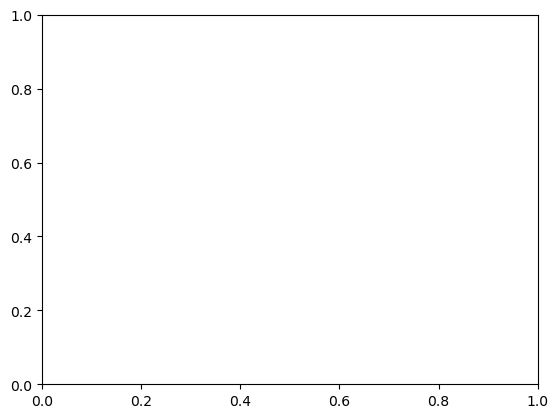

In [12]:
from scipy.interpolate import griddata

points_by_method = [combi_points, cell_points, extend_points, sdim_points]
method_names = ['Static Sparse Grid', 'Cell Method', 'Extend Method', 'Single Dim Method']
rmse_by_method = []
num_points_by_method = []
test_grid_size = 100
x = np.linspace(0,1,test_grid_size)
y = np.linspace(0,1,test_grid_size)
X,Y = np.meshgrid(x,y)
pos_test = np.dstack((X, Y))
        
for points in points_by_method:
    rmse = []
    num_points = []
    for p_step in points:
        px, py = zip(*p_step) 
        z_train = [mmg_wraped.eval(p) for p in p_step]
        Z_interpolate = griddata((px, py), z_train, (X, Y), method='linear')
        Z_true = mmg.evaluate(pos_test)
        rmse.append(np.sqrt(np.mean((Z_true - Z_interpolate)**2)))
        num_points.append(np.unique(p_step))

    rmse_by_method.append(rmse)
    num_points_by_method.append(num_points)

# equidistant fixed grid
num_grid_points = np.arange(3,17)
rmse_grid = []
num_points_grid = []
for ng in num_grid_points:
    x = np.linspace(0,1,ng)
    y = np.linspace(0,1,ng)

    px, py, z_train = [], [], []
    for xi in x:
        for yi in y:
            px.append(xi)
            py.append(yi)
            z_train.append(mmg_wraped.eval((xi,yi)))
    
    Z_interpolate = griddata((px,py), z_train, (X, Y), method='linear')
    Z_true = mmg.evaluate(pos_test)
    rmse_grid.append(np.sqrt(np.mean((Z_true - Z_interpolate)**2)))
    num_points_grid.append(ng**2)
        

fig = plt.figure()
for rmse, num_points, method_name in zip(rmse_by_method, num_points_by_method, method_names):
    plt.plot(num_points, rmse, label=method_name)

# plt.plot(num_points_grid, rmse_grid, label='Fixed Grid')

plt.ylabel('Root Mean Square Error')
plt.xlabel('Number of Points')
plt.legend()
plt.show()